# 提供银行精准营销解决方案

## 赛题描述
比赛地址: https://www.kesci.com/home/competition/5c234c6626ba91002bfdfdd3

本练习赛的数据，选自UCI机器学习库中的「银行营销数据集(Bank Marketing Data Set)」

这些数据与葡萄牙银行机构的营销活动相关。这些营销活动以电话为基础，一般，银行的客服人员需要联系客户至少一次，以此确认客户是否将认购该银行的产品（定期存款）。

因此，与该数据集对应的任务是「分类任务」，「分类目标」是预测客户是(' 1 ')或者否(' 0 ')购买该银行的产品。

In [8]:
# 导入相关包
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

INPUT_PATH = 'dataset' # 输入目录
def load_data(file, path=INPUT_PATH):
    """  
        加载csv文件
    """
    csv_path=os.path.join(path, file)
    return pd.read_csv(csv_path)

In [3]:
# 看下数据 这里数据有18个属性
bank_data = load_data("train_set.csv")
bank_data.head()
# bank_data.drop(['ID'],inplace=True,axis=1)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [4]:
bank_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# info() 方法可以快速查看数据的描述，特别是总行数、每个属性的类型和非空值的数量
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 18 columns):
ID           25317 non-null int64
age          25317 non-null int64
job          25317 non-null object
marital      25317 non-null object
education    25317 non-null object
default      25317 non-null object
balance      25317 non-null int64
housing      25317 non-null object
loan         25317 non-null object
contact      25317 non-null object
day          25317 non-null int64
month        25317 non-null object
duration     25317 non-null int64
campaign     25317 non-null int64
pdays        25317 non-null int64
previous     25317 non-null int64
poutcome     25317 non-null object
y            25317 non-null int64
dtypes: int64(9), object(9)
memory usage: 3.5+ MB


In [6]:
# 查看标签比例
bank_data["y"].value_counts()

0    22356
1     2961
Name: y, dtype: int64

In [10]:
# 工作类型分类
bank_data["job"].value_counts()

blue-collar      5456
management       5296
technician       4241
admin.           2909
services         2342
retired          1273
self-employed     884
entrepreneur      856
unemployed        701
housemaid         663
student           533
unknown           163
Name: job, dtype: int64

In [11]:
# 婚姻状态
bank_data["marital"].value_counts()

married     15245
single       7157
divorced     2915
Name: marital, dtype: int64

In [12]:
# 收入
bank_data["balance"].value_counts()

0        1936
1         121
4          82
2          81
3          72
         ... 
14107       1
6212        1
8259        1
43074       1
2407        1
Name: balance, Length: 5736, dtype: int64

In [13]:
# 是否有违约记录
bank_data["default"].value_counts()

no     24869
yes      448
Name: default, dtype: int64

In [14]:
# 是否有个人贷款
bank_data["loan"].value_counts()

no     21258
yes     4059
Name: loan, dtype: int64

In [15]:
# 是否有住房贷款
bank_data["housing"].value_counts()

yes    14020
no     11297
Name: housing, dtype: int64

In [16]:
# 与客户联系的沟通方式
bank_data["contact"].value_counts()

cellular     16391
unknown       7281
telephone     1645
Name: contact, dtype: int64

In [17]:
# 上一次活动的结果
bank_data["poutcome"].value_counts()

unknown    20677
failure     2735
other       1070
success      835
Name: poutcome, dtype: int64

In [19]:
# 统计信息
bank_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,y
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,1357.555082,15.835289,257.732393,2.772050,40.248766,0.591737,0.116957
std,7308.532719,10.634289,2999.822811,8.319480,256.975151,3.136097,100.213541,2.568313,0.321375
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6330.000000,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,12659.000000,39.000000,448.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000
75%,18988.000000,48.000000,1435.000000,21.000000,317.000000,3.000000,-1.000000,0.000000,0.000000
max,25317.000000,95.000000,102127.000000,31.000000,3881.000000,55.000000,854.000000,275.000000,1.000000


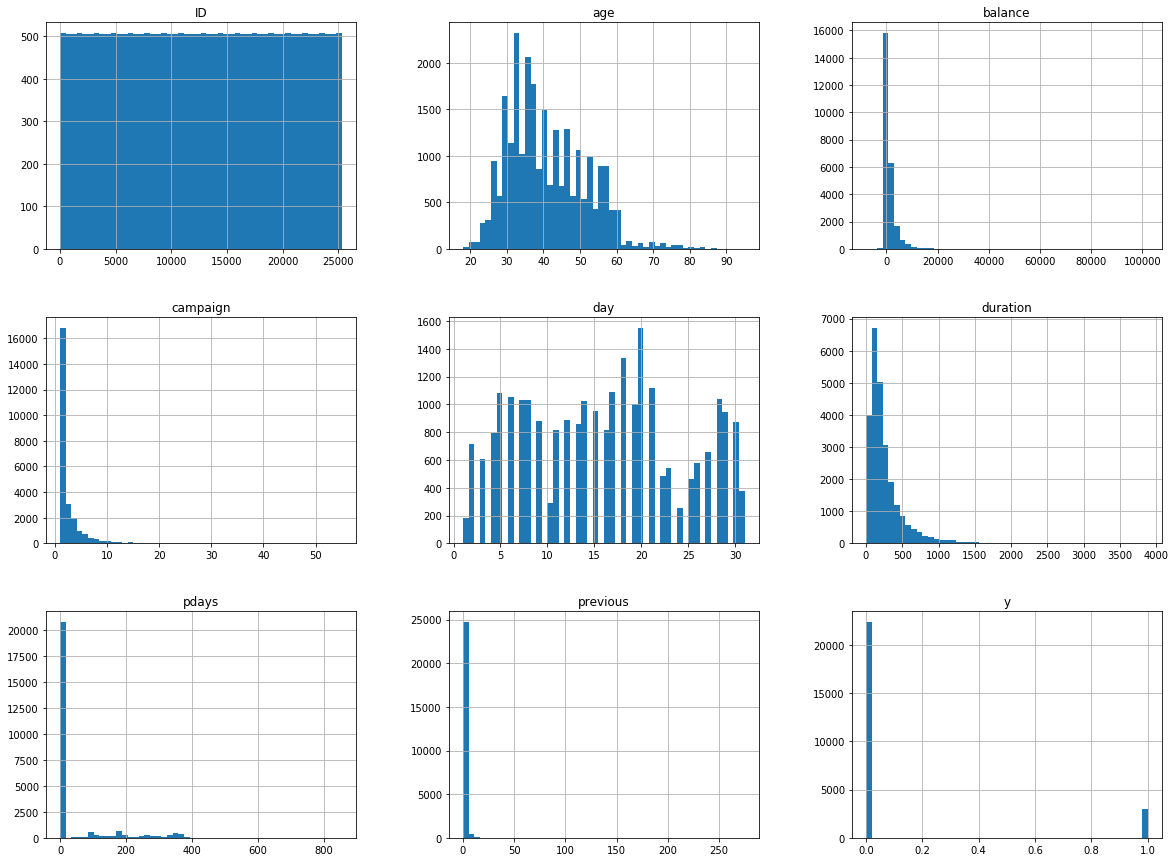

In [21]:
# 观察每个数值属性的柱状图
import matplotlib.pyplot as plt
bank_data.hist(bins=50, figsize=(20,15))
plt.show()

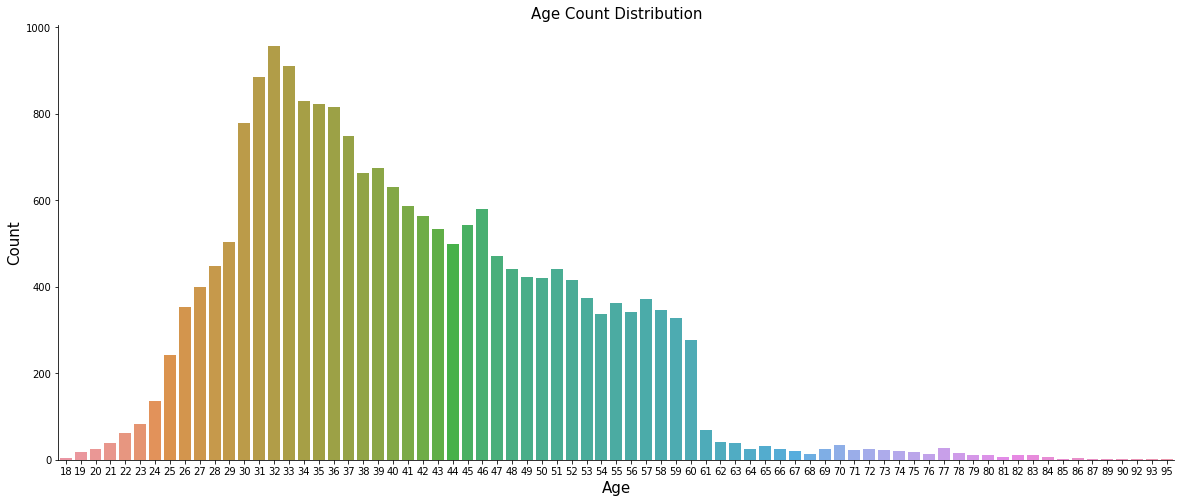

In [22]:
# 年龄
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_set)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()
plt.show()

In [34]:
print('第一四分位数: ', bank_set['age'].quantile(q = 0.25))
print('第二四分位数: ', bank_set['age'].quantile(q = 0.50))
print('第三四分位数: ', bank_set['age'].quantile(q = 0.75))
print('第四四分位数: ', bank_set['age'].quantile(q = 1.00))
p = bank_set['age'].quantile(q = 0.75) + 1.5*(bank_set['age'].quantile(q = 0.75) - bank_set['age'].quantile(q = 0.25))
print('age > %s 属于异常值' % p)
def age(dataframe):
    dataframe.loc[dataframe['age'] <= bank_set['age'].quantile(q = 0.25), 'age'] = 1
    dataframe.loc[(dataframe['age'] > bank_set['age'].quantile(q = 0.25)) & (dataframe['age'] <= bank_set['age'].quantile(q = 0.75)), 'age'] = 2
    dataframe.loc[(dataframe['age'] > bank_set['age'].quantile(q = 0.75)) & (dataframe['age'] <= p), 'age'] = 3
    dataframe.loc[(dataframe['age'] > p) & (dataframe['age'] <= bank_set['age'].quantile(q = 1.00)), 'age'] = 4
    return dataframe

第一四分位数:  33.0
第二四分位数:  39.0
第三四分位数:  48.0
第四四分位数:  95.0
age > 70.5 属于异常值


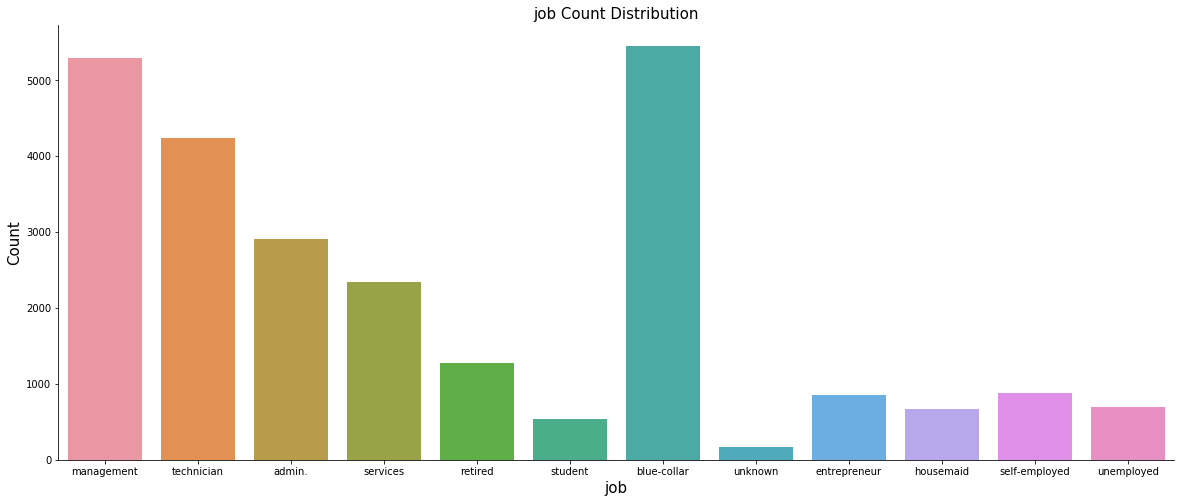

In [36]:
# 工作分布
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_data)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('job Count Distribution', fontsize=15)
sns.despine()
plt.show()

In [37]:
# 分类值处理
from sklearn.preprocessing import OrdinalEncoder
bank_cat = bank_set[['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month']]
ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(bank_cat)
cat_encoded

array([[2., 1., 1., ..., 0., 0., 8.],
       [6., 1., 2., ..., 0., 3., 1.],
       [9., 1., 1., ..., 0., 3., 5.],
       ...,
       [7., 2., 1., ..., 2., 3., 8.],
       [4., 1., 1., ..., 1., 3., 9.],
       [9., 1., 1., ..., 0., 3., 1.]])

In [39]:

print('第一四分位数: ', bank_data['duration'].quantile(q = 0.25))
print('第二四分位数: ', bank_data['duration'].quantile(q = 0.50))
print('第三四分位数: ', bank_data['duration'].quantile(q = 0.75))
print('第四四分位数: ', bank_data['duration'].quantile(q = 1.00))
pp = bank_data['duration'].quantile(q = 0.75) + 1.5*(bank_data['duration'].quantile(q = 0.75) - bank_data['duration'].quantile(q = 0.25))
print('duration > ', pp, '属于异常值')


def duration(dataframe):
    dataframe.loc[dataframe['duration'] <= bank_set['duration'].quantile(q = 0.25), 'duration'] = 1
    dataframe.loc[(dataframe['duration'] > bank_set['duration'].quantile(q = 0.25)) & (dataframe['duration'] <= bank_set['duration'].quantile(q = 0.75)), 'age'] = 2
    dataframe.loc[(dataframe['duration'] > bank_set['duration'].quantile(q = 0.75)) & (dataframe['duration'] <= p), 'duration'] = 3
    dataframe.loc[(dataframe['duration'] > p) & (dataframe['duration'] <= bank_set['duration'].quantile(q = 1.00)), 'duration'] = 4
    return dataframe


第一四分位数:  103.0
第二四分位数:  181.0
第三四分位数:  317.0
第四四分位数:  3881.0
duration >  638.0 属于异常值


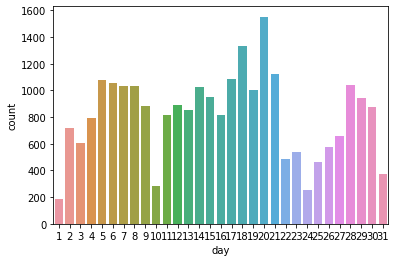

In [41]:
# day 最后一次联系的时间
import seaborn as sns
sns.countplot(x = 'day', data = bank_data)
plt.show()

In [44]:
#  训练集拆分 分层采用

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=41)
for train_index, test_index in split.split(bank_data, bank_data["y"]):
    strat_train_set=bank_data.loc[train_index]
    strat_test_set=bank_data.loc[test_index]

new_bank_data = strat_train_set.copy()
bank_set=new_bank_data.iloc[:,new_bank_data.columns!='y']
bank_labels=new_bank_data.iloc[:,new_bank_data.columns=='y']
bank_set.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1746,1747,40,entrepreneur,married,secondary,no,285,no,no,cellular,18,may,261,1,178,1,failure
1181,1182,54,self-employed,married,tertiary,no,0,yes,no,cellular,20,aug,83,5,-1,0,unknown
18258,18259,42,technician,married,secondary,no,682,yes,no,cellular,14,jul,285,2,-1,0,unknown
6925,6926,32,blue-collar,single,secondary,no,2597,yes,no,cellular,15,may,233,1,368,1,failure
23275,23276,57,retired,married,secondary,no,1044,no,no,telephone,11,jan,585,1,192,2,success


In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


def create_data(strat_set):
    """
        处理数据
    """
    new_bank_data = strat_set.copy()
    bank_set=new_bank_data.iloc[:,new_bank_data.columns!='y']
    bank_labels=new_bank_data.iloc[:,new_bank_data.columns=='y']

    # 去除ID列
    bank_set.drop(['ID'],inplace=True,axis=1)
    
    labelencoder_X = LabelEncoder()

    bank_set["all_count"] = bank_set["campaign"] + bank_set["previous"]
    bank_set.drop(['campaign', 'previous'],inplace=True,axis=1)
    
    
    for item in ['housing', 'loan', 'default']:
        bank_set[item] = labelencoder_X.fit_transform(bank_set[item])
        bank_set[item] = bank_set[item]
    
    cat_attribs = ['job', 'marital','education', 'contact', 'poutcome', 'month']
    
    for item in cat_attribs:
        column_list = set(bank_set[item])
        new_columns = {name: item + "_" + str(name) for name in column_list}
        one_hot = pd.get_dummies(bank_set[item]).rename(columns=new_columns)
        bank_set = pd.concat([bank_set, one_hot], axis=1)

    for item in cat_attribs:
        bank_set.drop([item],inplace=True,axis=1)
    
    bank_set.drop(['contact_unknown'],inplace=True,axis=1)
    bank_set.drop(['poutcome_unknown'],inplace=True,axis=1)
    bank_set.drop(['job_unknown'],inplace=True,axis=1)
    bank_set.drop(['education_unknown'],inplace=True,axis=1)

    return bank_set, bank_labels


In [47]:
# 训练集
bank_set, bank_labels = create_data(strat_train_set)
bank_set.head()

,age,default,balance,housing,loan,day,duration,pdays,all_count,job_admin.,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
1746,40,0,285,0,0,18,261,178,2,0,...,0,0,0,0,0,0,1,0,0,0
1181,54,0,0,1,0,20,83,-1,5,0,...,0,0,0,0,0,0,0,0,0,0
18258,42,0,682,1,0,14,285,-1,2,0,...,0,0,0,1,0,0,0,0,0,0
6925,32,0,2597,1,0,15,233,368,2,0,...,0,0,0,0,0,0,1,0,0,0
23275,57,0,1044,0,0,11,585,192,3,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# 验证集
val_set, val_labels = create_data(strat_test_set)
val_set.head()

,age,default,balance,housing,loan,day,duration,pdays,all_count,job_admin.,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
2946,29,0,190,0,0,7,51,-1,1,0,...,0,0,0,0,0,0,1,0,0,0
17450,48,0,547,0,0,28,74,176,3,0,...,0,0,1,0,0,0,0,0,0,0
24220,67,0,2540,0,0,14,278,116,9,0,...,0,0,0,0,1,0,0,0,0,0
17663,26,0,831,0,1,23,84,-1,13,0,...,0,0,0,1,0,0,0,0,0,0
12714,32,0,3322,1,0,20,380,74,5,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# 测试集
test_data=load_data("test_set.csv")
test_set, test_labels = create_data(test_data)
test_set.head()

,age,default,balance,housing,loan,day,duration,pdays,all_count,job_admin.,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,51,0,174,0,0,29,308,-1,3,0,...,0,0,0,1,0,0,0,0,0,0
1,32,0,6059,1,0,20,110,-1,2,0,...,0,0,0,0,0,0,0,1,0,0
2,60,0,0,0,0,30,130,-1,3,0,...,0,0,0,1,0,0,0,0,0,0
3,32,0,64,0,0,30,598,105,9,0,...,0,0,0,0,1,0,0,0,0,0
4,41,0,0,1,1,15,368,-1,4,0,...,0,0,0,1,0,0,0,0,0,0


## 选择模型并训练-baseline

In [61]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold

result_pd = pd.DataFrame(data=test_data['ID'], columns=['ID'])
result_pd['pred'] = 0

n_splits = 10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
clf = lgb.LGBMClassifier(
        boosting_type="gbdt", num_leaves=30, reg_alpha=0, reg_lambda=0.,
    max_depth=-1, n_estimators=1500, objective='binary',metric= 'auc',
    subsample=0.95, colsample_bytree=0.7, subsample_freq=1,
    learning_rate=0.04, random_state=42
    )
train_x = np.array(bank_set)
train_y = np.array(bank_labels)


for train_idx, val_idx in kfold.split(train_x):
    clf.random_state = clf.random_state + 1
    
    train_x1 = bank_set.iloc[train_idx]
    train_y1 = bank_labels.iloc[train_idx]
    
    test_x1 = bank_set.iloc[val_idx]
    test_y1 = bank_labels.iloc[val_idx]
    
    clf.fit(train_x1, train_y1,eval_set=[(train_x1, train_y1),(test_x1, test_y1)],eval_metric='auc',early_stopping_rounds=20,
           )
    result_pd['pred'] += clf.predict_proba(test_set)[:,1]
    

y_pred=clf.predict(val_set)
y_predprob=clf.predict_proba(val_set)[:,1]
print("AUC Score(Train data): %f" % roc_auc_score(val_labels,y_predprob))

[1]	training's auc: 0.893294	valid_1's auc: 0.881494
Training until validation scores don't improve for 20 rounds.
[2]	training's auc: 0.912267	valid_1's auc: 0.896597
[3]	training's auc: 0.919198	valid_1's auc: 0.907507
[4]	training's auc: 0.92512	valid_1's auc: 0.912934
[5]	training's auc: 0.927267	valid_1's auc: 0.913444
[6]	training's auc: 0.928068	valid_1's auc: 0.913318
[7]	training's auc: 0.930073	valid_1's auc: 0.915932
[8]	training's auc: 0.933159	valid_1's auc: 0.917771
[9]	training's auc: 0.933759	valid_1's auc: 0.919494
[10]	training's auc: 0.935586	valid_1's auc: 0.922327
[11]	training's auc: 0.935521	valid_1's auc: 0.922467
[12]	training's auc: 0.936122	valid_1's auc: 0.921967
[13]	training's auc: 0.936431	valid_1's auc: 0.922108
[14]	training's auc: 0.936573	valid_1's auc: 0.921698
[15]	training's auc: 0.936776	valid_1's auc: 0.921563
[16]	training's auc: 0.936849	valid_1's auc: 0.921021
[17]	training's auc: 0.937237	valid_1's auc: 0.9206
[18]	training's auc: 0.937585	va

[39]	training's auc: 0.941548	valid_1's auc: 0.938427
[40]	training's auc: 0.94167	valid_1's auc: 0.938601
[41]	training's auc: 0.941916	valid_1's auc: 0.938328
[42]	training's auc: 0.942255	valid_1's auc: 0.938433
[43]	training's auc: 0.942425	valid_1's auc: 0.93863
[44]	training's auc: 0.942617	valid_1's auc: 0.938489
[45]	training's auc: 0.942606	valid_1's auc: 0.938555
[46]	training's auc: 0.942781	valid_1's auc: 0.93882
[47]	training's auc: 0.942964	valid_1's auc: 0.93886
[48]	training's auc: 0.943237	valid_1's auc: 0.939004
[49]	training's auc: 0.943339	valid_1's auc: 0.938873
[50]	training's auc: 0.943504	valid_1's auc: 0.938795
[51]	training's auc: 0.94397	valid_1's auc: 0.939095
[52]	training's auc: 0.944657	valid_1's auc: 0.939742
[53]	training's auc: 0.94481	valid_1's auc: 0.9395
[54]	training's auc: 0.944967	valid_1's auc: 0.93957
[55]	training's auc: 0.944994	valid_1's auc: 0.939429
[56]	training's auc: 0.94516	valid_1's auc: 0.939265
[57]	training's auc: 0.945341	valid_1'

[143]	training's auc: 0.961958	valid_1's auc: 0.929614
[144]	training's auc: 0.962127	valid_1's auc: 0.929617
[145]	training's auc: 0.962273	valid_1's auc: 0.929459
[146]	training's auc: 0.962404	valid_1's auc: 0.929435
[147]	training's auc: 0.962561	valid_1's auc: 0.929517
[148]	training's auc: 0.962627	valid_1's auc: 0.929471
[149]	training's auc: 0.962736	valid_1's auc: 0.92943
[150]	training's auc: 0.962865	valid_1's auc: 0.929546
[151]	training's auc: 0.962996	valid_1's auc: 0.929532
[152]	training's auc: 0.963216	valid_1's auc: 0.929503
[153]	training's auc: 0.963339	valid_1's auc: 0.929365
[154]	training's auc: 0.96349	valid_1's auc: 0.929379
[155]	training's auc: 0.96362	valid_1's auc: 0.929297
[156]	training's auc: 0.963754	valid_1's auc: 0.929476
[157]	training's auc: 0.963909	valid_1's auc: 0.929527
[158]	training's auc: 0.96401	valid_1's auc: 0.929663
[159]	training's auc: 0.96413	valid_1's auc: 0.929641
[160]	training's auc: 0.964247	valid_1's auc: 0.929597
[161]	training'

[70]	training's auc: 0.948119	valid_1's auc: 0.926106
[71]	training's auc: 0.948441	valid_1's auc: 0.926445
[72]	training's auc: 0.948505	valid_1's auc: 0.926431
[73]	training's auc: 0.948641	valid_1's auc: 0.926424
[74]	training's auc: 0.948864	valid_1's auc: 0.926632
[75]	training's auc: 0.9491	valid_1's auc: 0.926809
[76]	training's auc: 0.94921	valid_1's auc: 0.926843
[77]	training's auc: 0.949308	valid_1's auc: 0.926722
[78]	training's auc: 0.949538	valid_1's auc: 0.926918
[79]	training's auc: 0.949832	valid_1's auc: 0.926976
[80]	training's auc: 0.949971	valid_1's auc: 0.92708
[81]	training's auc: 0.950087	valid_1's auc: 0.927114
[82]	training's auc: 0.950289	valid_1's auc: 0.927271
[83]	training's auc: 0.950447	valid_1's auc: 0.927516
[84]	training's auc: 0.950621	valid_1's auc: 0.92738
[85]	training's auc: 0.950942	valid_1's auc: 0.927485
[86]	training's auc: 0.951313	valid_1's auc: 0.927669
[87]	training's auc: 0.951472	valid_1's auc: 0.927659
[88]	training's auc: 0.951768	val

[36]	training's auc: 0.940158	valid_1's auc: 0.923919
[37]	training's auc: 0.940295	valid_1's auc: 0.924137
[38]	training's auc: 0.940972	valid_1's auc: 0.924306
[39]	training's auc: 0.941444	valid_1's auc: 0.924481
[40]	training's auc: 0.941839	valid_1's auc: 0.924687
[41]	training's auc: 0.941978	valid_1's auc: 0.924678
[42]	training's auc: 0.942165	valid_1's auc: 0.924795
[43]	training's auc: 0.942643	valid_1's auc: 0.925331
[44]	training's auc: 0.942704	valid_1's auc: 0.925132
[45]	training's auc: 0.942949	valid_1's auc: 0.925235
[46]	training's auc: 0.9435	valid_1's auc: 0.926299
[47]	training's auc: 0.944033	valid_1's auc: 0.926464
[48]	training's auc: 0.94425	valid_1's auc: 0.926625
[49]	training's auc: 0.944354	valid_1's auc: 0.926666
[50]	training's auc: 0.944754	valid_1's auc: 0.926992
[51]	training's auc: 0.944909	valid_1's auc: 0.927104
[52]	training's auc: 0.945272	valid_1's auc: 0.927468
[53]	training's auc: 0.945345	valid_1's auc: 0.927657
[54]	training's auc: 0.94543	va

[34]	training's auc: 0.938172	valid_1's auc: 0.922411
[35]	training's auc: 0.93832	valid_1's auc: 0.92294
[36]	training's auc: 0.938732	valid_1's auc: 0.922988
[37]	training's auc: 0.93879	valid_1's auc: 0.922798
[38]	training's auc: 0.939387	valid_1's auc: 0.923511
[39]	training's auc: 0.939761	valid_1's auc: 0.923575
[40]	training's auc: 0.939855	valid_1's auc: 0.923772
[41]	training's auc: 0.940168	valid_1's auc: 0.923897
[42]	training's auc: 0.940619	valid_1's auc: 0.92389
[43]	training's auc: 0.94116	valid_1's auc: 0.924264
[44]	training's auc: 0.941308	valid_1's auc: 0.924195
[45]	training's auc: 0.941429	valid_1's auc: 0.924466
[46]	training's auc: 0.942054	valid_1's auc: 0.925055
[47]	training's auc: 0.94235	valid_1's auc: 0.925748
[48]	training's auc: 0.942961	valid_1's auc: 0.926075
[49]	training's auc: 0.943249	valid_1's auc: 0.926325
[50]	training's auc: 0.943511	valid_1's auc: 0.926417
[51]	training's auc: 0.943663	valid_1's auc: 0.926282
[52]	training's auc: 0.943834	vali

[36]	training's auc: 0.939059	valid_1's auc: 0.925543
[37]	training's auc: 0.939099	valid_1's auc: 0.925465
[38]	training's auc: 0.939172	valid_1's auc: 0.925084
[39]	training's auc: 0.939473	valid_1's auc: 0.925187
[40]	training's auc: 0.94014	valid_1's auc: 0.925596
[41]	training's auc: 0.940248	valid_1's auc: 0.925732
[42]	training's auc: 0.940502	valid_1's auc: 0.925802
[43]	training's auc: 0.940697	valid_1's auc: 0.925732
[44]	training's auc: 0.9412	valid_1's auc: 0.925759
[45]	training's auc: 0.941635	valid_1's auc: 0.926144
[46]	training's auc: 0.941683	valid_1's auc: 0.926027
[47]	training's auc: 0.942121	valid_1's auc: 0.926526
[48]	training's auc: 0.942227	valid_1's auc: 0.926931
[49]	training's auc: 0.942378	valid_1's auc: 0.926723
[50]	training's auc: 0.942704	valid_1's auc: 0.926635
[51]	training's auc: 0.942834	valid_1's auc: 0.926743
[52]	training's auc: 0.943078	valid_1's auc: 0.926807
[53]	training's auc: 0.943535	valid_1's auc: 0.927062
[54]	training's auc: 0.943714	v

[1]	training's auc: 0.880698	valid_1's auc: 0.885644
Training until validation scores don't improve for 20 rounds.
[2]	training's auc: 0.899523	valid_1's auc: 0.899159
[3]	training's auc: 0.911514	valid_1's auc: 0.911399
[4]	training's auc: 0.919498	valid_1's auc: 0.915976
[5]	training's auc: 0.923926	valid_1's auc: 0.917924
[6]	training's auc: 0.925658	valid_1's auc: 0.921799
[7]	training's auc: 0.927532	valid_1's auc: 0.921227
[8]	training's auc: 0.929112	valid_1's auc: 0.923715
[9]	training's auc: 0.930741	valid_1's auc: 0.924043
[10]	training's auc: 0.932245	valid_1's auc: 0.925938
[11]	training's auc: 0.932826	valid_1's auc: 0.927087
[12]	training's auc: 0.932876	valid_1's auc: 0.926553
[13]	training's auc: 0.934566	valid_1's auc: 0.926815
[14]	training's auc: 0.934481	valid_1's auc: 0.925701
[15]	training's auc: 0.934785	valid_1's auc: 0.926536
[16]	training's auc: 0.935642	valid_1's auc: 0.927782
[17]	training's auc: 0.935675	valid_1's auc: 0.926719
[18]	training's auc: 0.936042

[191]	training's auc: 0.967996	valid_1's auc: 0.941446
[192]	training's auc: 0.968082	valid_1's auc: 0.941427
[193]	training's auc: 0.968184	valid_1's auc: 0.941406
Early stopping, best iteration is:
[173]	training's auc: 0.965749	valid_1's auc: 0.941448
[1]	training's auc: 0.749948	valid_1's auc: 0.723045
Training until validation scores don't improve for 20 rounds.
[2]	training's auc: 0.90504	valid_1's auc: 0.883664
[3]	training's auc: 0.919858	valid_1's auc: 0.909632
[4]	training's auc: 0.921177	valid_1's auc: 0.910476
[5]	training's auc: 0.924693	valid_1's auc: 0.915512
[6]	training's auc: 0.926791	valid_1's auc: 0.919423
[7]	training's auc: 0.927611	valid_1's auc: 0.918385
[8]	training's auc: 0.928759	valid_1's auc: 0.919236
[9]	training's auc: 0.928263	valid_1's auc: 0.918462
[10]	training's auc: 0.929474	valid_1's auc: 0.919024
[11]	training's auc: 0.929491	valid_1's auc: 0.919196
[12]	training's auc: 0.930962	valid_1's auc: 0.920368
[13]	training's auc: 0.931571	valid_1's auc: 

[36]	training's auc: 0.941733	valid_1's auc: 0.928183
[37]	training's auc: 0.941909	valid_1's auc: 0.928187
[38]	training's auc: 0.942049	valid_1's auc: 0.928067
[39]	training's auc: 0.942259	valid_1's auc: 0.928357
[40]	training's auc: 0.942638	valid_1's auc: 0.929018
[41]	training's auc: 0.942676	valid_1's auc: 0.928873
[42]	training's auc: 0.942831	valid_1's auc: 0.929067
[43]	training's auc: 0.942944	valid_1's auc: 0.929145
[44]	training's auc: 0.943405	valid_1's auc: 0.929305
[45]	training's auc: 0.943502	valid_1's auc: 0.929356
[46]	training's auc: 0.94441	valid_1's auc: 0.929724
[47]	training's auc: 0.944663	valid_1's auc: 0.929907
[48]	training's auc: 0.945036	valid_1's auc: 0.930035
[49]	training's auc: 0.945217	valid_1's auc: 0.930209
[50]	training's auc: 0.945656	valid_1's auc: 0.93017
[51]	training's auc: 0.945794	valid_1's auc: 0.930248
[52]	training's auc: 0.946055	valid_1's auc: 0.930515
[53]	training's auc: 0.94658	valid_1's auc: 0.930738
[54]	training's auc: 0.946922	v

[210]	training's auc: 0.970111	valid_1's auc: 0.936755
[211]	training's auc: 0.970288	valid_1's auc: 0.936675
[212]	training's auc: 0.970392	valid_1's auc: 0.936604
[213]	training's auc: 0.970486	valid_1's auc: 0.936555
[214]	training's auc: 0.97061	valid_1's auc: 0.936633
[215]	training's auc: 0.970713	valid_1's auc: 0.936682
[216]	training's auc: 0.970809	valid_1's auc: 0.93655
[217]	training's auc: 0.970931	valid_1's auc: 0.936618
[218]	training's auc: 0.971071	valid_1's auc: 0.936643
[219]	training's auc: 0.971134	valid_1's auc: 0.936616
[220]	training's auc: 0.971239	valid_1's auc: 0.936667
[221]	training's auc: 0.971323	valid_1's auc: 0.936535
[222]	training's auc: 0.971424	valid_1's auc: 0.936545
[223]	training's auc: 0.971492	valid_1's auc: 0.93655
[224]	training's auc: 0.971543	valid_1's auc: 0.936733
Early stopping, best iteration is:
[204]	training's auc: 0.969547	valid_1's auc: 0.936768
AUC Score(Train data): 0.937615


In [62]:
# 保存 --- 验证集结果 auc分数为: 0.937
result_pd['pred'] = result_pd['pred']/n_splits
result_pd.to_csv('submit_result.csv', index=False)

## 其他

In [63]:
# 查看特征重要性
# 可用于选择特征重新训练
feature_importances = clf.feature_importances_
sorted(zip(feature_importances, val_set.columns), reverse=True)

[(812, 'duration'),
 (753, 'day'),
 (708, 'balance'),
 (583, 'age'),
 (512, 'pdays'),
 (272, 'all_count'),
 (164, 'contact_cellular'),
 (151, 'month_may'),
 (139, 'housing'),
 (116, 'month_jul'),
 (103, 'month_apr'),
 (95, 'month_aug'),
 (94, 'month_jun'),
 (92, 'month_nov'),
 (88, 'month_mar'),
 (85, 'poutcome_success'),
 (85, 'month_oct'),
 (85, 'month_feb'),
 (81, 'marital_married'),
 (77, 'education_primary'),
 (72, 'education_tertiary'),
 (71, 'loan'),
 (71, 'contact_telephone'),
 (58, 'poutcome_failure'),
 (56, 'month_jan'),
 (52, 'education_secondary'),
 (51, 'month_sep'),
 (47, 'job_blue-collar'),
 (45, 'job_admin.'),
 (34, 'marital_divorced'),
 (34, 'job_management'),
 (31, 'month_dec'),
 (31, 'job_technician'),
 (28, 'marital_single'),
 (27, 'poutcome_other'),
 (21, 'job_services'),
 (16, 'job_unemployed'),
 (16, 'job_housemaid'),
 (15, 'job_entrepreneur'),
 (13, 'default'),
 (11, 'job_student'),
 (11, 'job_retired'),
 (10, 'job_self-employed')]

In [59]:
# 交叉验证
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
n_splits = 10
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
gbm1=GradientBoostingClassifier(random_state=42)
gbm1.fit(bank_set,bank_labels)
LOGCV = (cross_val_score(gbm1, bank_set, bank_labels, cv=kfold, n_jobs=1, scoring = 'roc_auc'))
LOGCV.mean()
y_pred=gbm1.predict(val_set)
y_predprob=gbm1.predict_proba(val_set)[:,1]
print(LOGCV)
print("AUC Score(Train data): %f" % roc_auc_score(val_labels,y_predprob))

[0.901588   0.92553179 0.91927933 0.92727946 0.91956338 0.93092487
 0.93423574 0.92104891 0.92493794 0.92891878]
AUC Score(Train data): 0.929382


## 最终版本

In [100]:
train = pd.read_csv('dataset/train_set.csv')
test = pd.read_csv('dataset/test_set.csv')
data = pd.concat([train, test])
data["month"] = data["month"].map({"jan": 1, "feb": 2, 'mar': 3, 'apr': 4, 
                                   'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
                                   'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
data['quater_of_year'] = data['month'].apply(lambda x : x//4)  # 季度
data['quater_of_month'] = data['day'].apply(lambda x : x//7)  # 周
data['balance_positive'] = data['balance'].apply(lambda x : 0 if x < 0 else 1) # 是否有存款
data['month_mul_day'] = data['month'] * 30 + data['day']
data['age_mod_30'] = data['age'].apply(lambda x : x//30)

def feature_count(data, features):
    feature_name = 'count'
    for i in features:
        feature_name += '_' + i
    temp = data.groupby(features).size().reset_index().rename(columns={0: feature_name})
    data = data.merge(temp, 'left', on=features)
    return data, feature_name

def get_new_columns(name, aggs):
    l = []
    for k in aggs.keys():
        for agg in aggs[k]:
            if str(type(agg)) == "<class 'function'>":
                l.append(name + '_' + k + '_' + 'other')
            else:
                l.append(name + '_' + k + '_' + agg)
    return l

# 日期交叉统计特征
date_columns = ['campaign', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for f in date_columns:
    data, _ = feature_count(data, ['day','month', f])

# 客户的统计特征
# 分组统计f_a的f_b 数值，并作为新特征
f_a = ['job', 'marital', 'education']
f_b = ['balance', 'duration']

aggs = {}
for b in f_b:
    aggs[b] = ['mean','max','min','std']
    
for a in f_a:
    for b in f_b:
        tmp = data.groupby(a, as_index=False).agg(aggs)
        tmp.columns = [a] + get_new_columns(a, aggs)
        data = pd.merge(data, tmp, on=a, how='left')

        
le =LabelEncoder()
for label in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']:
    le.fit(data[label])
    data[label] = le.transform(data[label])
        
X_train = data[data['y'].notnull()]
Y_train = X_train['y']
# 测试集
test_set = data[data['y'].isnull()]

X_train.drop(['ID', 'y'], axis=1, inplace=True)
test_set.drop(['ID','y'], axis=1, inplace=True)

feature_names = X_train.columns.tolist()
cat_attribs = ['job', 'marital','education', 'contact', 'poutcome', 'month', 'housing', 'loan', 'default', 'quater_of_month', 'age_mod_30']

#  训练集拆分 分层采用

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=41)
for train_index, test_index in split.split(X_train, Y_train):
    # 训练集
    bank_set=X_train.loc[train_index]
    bank_labels = Y_train.loc[train_index]
    # 验证集
    val_set=X_train.loc[test_index]
    val_labels = Y_train.loc[test_index]


In [101]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold

result_pd = pd.DataFrame(data=test_data['ID'], columns=['ID'])
result_pd['pred'] = 0

n_splits = 10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
clf = lgb.LGBMClassifier(
        boosting_type="gbdt", num_leaves=30, reg_alpha=0, reg_lambda=0.,
    max_depth=-1, n_estimators=1500, objective='binary',metric= 'auc',
    subsample=0.95, colsample_bytree=0.7, subsample_freq=1,
    learning_rate=0.04, random_state=42
    )
train_x = np.array(bank_set)
train_y = np.array(bank_labels)


for train_idx, val_idx in kfold.split(train_x):
    clf.random_state = clf.random_state + 1
    
    train_x1 = bank_set.iloc[train_idx]
    train_y1 = bank_labels.iloc[train_idx]
    
    test_x1 = bank_set.iloc[val_idx]
    test_y1 = bank_labels.iloc[val_idx]
    
    clf.fit(train_x1, train_y1,eval_set=[(train_x1, train_y1),(test_x1, test_y1)],eval_metric='auc',early_stopping_rounds=100,
            categorical_feature=cat_attribs,
           )
    result_pd['pred'] += clf.predict_proba(test_set)[:,1]
    

y_pred=clf.predict(val_set)
y_predprob=clf.predict_proba(val_set)[:,1]
print("AUC Score(Train data): %f" % roc_auc_score(val_labels,y_predprob))

[1]	training's auc: 0.909417	valid_1's auc: 0.920014
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.918572	valid_1's auc: 0.91719
[3]	training's auc: 0.930974	valid_1's auc: 0.927796
[4]	training's auc: 0.929578	valid_1's auc: 0.924499
[5]	training's auc: 0.929127	valid_1's auc: 0.924194
[6]	training's auc: 0.935559	valid_1's auc: 0.928068
[7]	training's auc: 0.938398	valid_1's auc: 0.92891
[8]	training's auc: 0.939618	valid_1's auc: 0.92952
[9]	training's auc: 0.94064	valid_1's auc: 0.93035
[10]	training's auc: 0.941227	valid_1's auc: 0.931607
[11]	training's auc: 0.941573	valid_1's auc: 0.931824
[12]	training's auc: 0.942239	valid_1's auc: 0.931678
[13]	training's auc: 0.942499	valid_1's auc: 0.931369
[14]	training's auc: 0.943225	valid_1's auc: 0.931897
[15]	training's auc: 0.943741	valid_1's auc: 0.93215
[16]	training's auc: 0.943898	valid_1's auc: 0.932495
[17]	training's auc: 0.943734	valid_1's auc: 0.932538
[18]	training's auc: 0.944315	vali

[170]	training's auc: 0.976538	valid_1's auc: 0.942704
[171]	training's auc: 0.976675	valid_1's auc: 0.942711
[172]	training's auc: 0.976762	valid_1's auc: 0.942647
[173]	training's auc: 0.976888	valid_1's auc: 0.942649
[174]	training's auc: 0.97702	valid_1's auc: 0.94268
[175]	training's auc: 0.977139	valid_1's auc: 0.942651
[176]	training's auc: 0.977257	valid_1's auc: 0.942622
[177]	training's auc: 0.97734	valid_1's auc: 0.942709
[178]	training's auc: 0.977467	valid_1's auc: 0.942698
[179]	training's auc: 0.977588	valid_1's auc: 0.9427
[180]	training's auc: 0.977737	valid_1's auc: 0.942638
[181]	training's auc: 0.977827	valid_1's auc: 0.942689
[182]	training's auc: 0.977945	valid_1's auc: 0.9427
[183]	training's auc: 0.978145	valid_1's auc: 0.942764
[184]	training's auc: 0.978282	valid_1's auc: 0.942775
[185]	training's auc: 0.978385	valid_1's auc: 0.942819
[186]	training's auc: 0.978514	valid_1's auc: 0.942866
[187]	training's auc: 0.978608	valid_1's auc: 0.942886
[188]	training's 

[100]	training's auc: 0.96507	valid_1's auc: 0.946512
[101]	training's auc: 0.965296	valid_1's auc: 0.946628
[102]	training's auc: 0.965478	valid_1's auc: 0.946684
[103]	training's auc: 0.965608	valid_1's auc: 0.946588
[104]	training's auc: 0.965777	valid_1's auc: 0.946479
[105]	training's auc: 0.966111	valid_1's auc: 0.946772
[106]	training's auc: 0.966297	valid_1's auc: 0.946739
[107]	training's auc: 0.96644	valid_1's auc: 0.94682
[108]	training's auc: 0.966657	valid_1's auc: 0.946767
[109]	training's auc: 0.966835	valid_1's auc: 0.946835
[110]	training's auc: 0.966982	valid_1's auc: 0.946828
[111]	training's auc: 0.967113	valid_1's auc: 0.946803
[112]	training's auc: 0.967269	valid_1's auc: 0.946856
[113]	training's auc: 0.967445	valid_1's auc: 0.946901
[114]	training's auc: 0.967616	valid_1's auc: 0.946904
[115]	training's auc: 0.967807	valid_1's auc: 0.947141
[116]	training's auc: 0.967956	valid_1's auc: 0.947252
[117]	training's auc: 0.968131	valid_1's auc: 0.947194
[118]	trainin

[255]	training's auc: 0.985131	valid_1's auc: 0.947219
[256]	training's auc: 0.985191	valid_1's auc: 0.947169
[257]	training's auc: 0.985321	valid_1's auc: 0.947371
[258]	training's auc: 0.985439	valid_1's auc: 0.947343
[259]	training's auc: 0.985516	valid_1's auc: 0.947273
[260]	training's auc: 0.985596	valid_1's auc: 0.947255
[261]	training's auc: 0.98568	valid_1's auc: 0.947273
[262]	training's auc: 0.985757	valid_1's auc: 0.947323
[263]	training's auc: 0.985856	valid_1's auc: 0.947381
[264]	training's auc: 0.985901	valid_1's auc: 0.947427
[265]	training's auc: 0.985973	valid_1's auc: 0.947457
[266]	training's auc: 0.986074	valid_1's auc: 0.947406
[267]	training's auc: 0.986197	valid_1's auc: 0.947396
[268]	training's auc: 0.986253	valid_1's auc: 0.947434
[269]	training's auc: 0.986343	valid_1's auc: 0.947434
[270]	training's auc: 0.986417	valid_1's auc: 0.947444
[271]	training's auc: 0.986498	valid_1's auc: 0.947422
[272]	training's auc: 0.98658	valid_1's auc: 0.94747
[273]	trainin

[20]	training's auc: 0.946308	valid_1's auc: 0.926425
[21]	training's auc: 0.946563	valid_1's auc: 0.926519
[22]	training's auc: 0.946811	valid_1's auc: 0.926512
[23]	training's auc: 0.947549	valid_1's auc: 0.927325
[24]	training's auc: 0.947765	valid_1's auc: 0.927083
[25]	training's auc: 0.948044	valid_1's auc: 0.92684
[26]	training's auc: 0.948447	valid_1's auc: 0.927017
[27]	training's auc: 0.948937	valid_1's auc: 0.92755
[28]	training's auc: 0.949327	valid_1's auc: 0.927186
[29]	training's auc: 0.950019	valid_1's auc: 0.927841
[30]	training's auc: 0.950292	valid_1's auc: 0.927935
[31]	training's auc: 0.950627	valid_1's auc: 0.928055
[32]	training's auc: 0.950922	valid_1's auc: 0.928026
[33]	training's auc: 0.95113	valid_1's auc: 0.927973
[34]	training's auc: 0.951285	valid_1's auc: 0.927721
[35]	training's auc: 0.951703	valid_1's auc: 0.928721
[36]	training's auc: 0.951979	valid_1's auc: 0.929026
[37]	training's auc: 0.952246	valid_1's auc: 0.928716
[38]	training's auc: 0.952416	v

[182]	training's auc: 0.978509	valid_1's auc: 0.931788
[183]	training's auc: 0.978594	valid_1's auc: 0.931698
[184]	training's auc: 0.978713	valid_1's auc: 0.931623
[185]	training's auc: 0.978832	valid_1's auc: 0.931553
[186]	training's auc: 0.978951	valid_1's auc: 0.931459
[187]	training's auc: 0.979097	valid_1's auc: 0.931577
[188]	training's auc: 0.979214	valid_1's auc: 0.931643
[189]	training's auc: 0.979338	valid_1's auc: 0.931611
[190]	training's auc: 0.979441	valid_1's auc: 0.931587
[191]	training's auc: 0.979551	valid_1's auc: 0.931553
[192]	training's auc: 0.979651	valid_1's auc: 0.931485
[193]	training's auc: 0.97977	valid_1's auc: 0.931485
[194]	training's auc: 0.979916	valid_1's auc: 0.931481
[195]	training's auc: 0.980012	valid_1's auc: 0.931374
[196]	training's auc: 0.980093	valid_1's auc: 0.931422
[197]	training's auc: 0.980201	valid_1's auc: 0.931454
[198]	training's auc: 0.980313	valid_1's auc: 0.931415
[199]	training's auc: 0.980415	valid_1's auc: 0.931529
[200]	train

[117]	training's auc: 0.96899	valid_1's auc: 0.932184
[118]	training's auc: 0.969225	valid_1's auc: 0.932268
[119]	training's auc: 0.969396	valid_1's auc: 0.932467
[120]	training's auc: 0.969548	valid_1's auc: 0.932419
[121]	training's auc: 0.969716	valid_1's auc: 0.932353
[122]	training's auc: 0.969894	valid_1's auc: 0.932348
[123]	training's auc: 0.970057	valid_1's auc: 0.932402
[124]	training's auc: 0.970206	valid_1's auc: 0.932261
[125]	training's auc: 0.970364	valid_1's auc: 0.932237
[126]	training's auc: 0.970508	valid_1's auc: 0.932225
[127]	training's auc: 0.970638	valid_1's auc: 0.932382
[128]	training's auc: 0.970776	valid_1's auc: 0.932484
[129]	training's auc: 0.970904	valid_1's auc: 0.932542
[130]	training's auc: 0.971056	valid_1's auc: 0.932506
[131]	training's auc: 0.971194	valid_1's auc: 0.932469
[132]	training's auc: 0.971336	valid_1's auc: 0.932503
[133]	training's auc: 0.971468	valid_1's auc: 0.932707
[134]	training's auc: 0.971606	valid_1's auc: 0.932833
[135]	train

[283]	training's auc: 0.987169	valid_1's auc: 0.932687
[284]	training's auc: 0.987236	valid_1's auc: 0.932644
[285]	training's auc: 0.987321	valid_1's auc: 0.93262
[286]	training's auc: 0.987389	valid_1's auc: 0.932552
[287]	training's auc: 0.987428	valid_1's auc: 0.932547
[288]	training's auc: 0.987499	valid_1's auc: 0.932576
[289]	training's auc: 0.987558	valid_1's auc: 0.93262
[290]	training's auc: 0.987604	valid_1's auc: 0.932598
[291]	training's auc: 0.987662	valid_1's auc: 0.932598
[292]	training's auc: 0.987742	valid_1's auc: 0.932484
[293]	training's auc: 0.987817	valid_1's auc: 0.932489
[294]	training's auc: 0.987863	valid_1's auc: 0.932523
[295]	training's auc: 0.98791	valid_1's auc: 0.932486
[296]	training's auc: 0.987995	valid_1's auc: 0.932472
[297]	training's auc: 0.988076	valid_1's auc: 0.932508
[298]	training's auc: 0.988152	valid_1's auc: 0.93254
[299]	training's auc: 0.988205	valid_1's auc: 0.932656
[300]	training's auc: 0.988295	valid_1's auc: 0.932612
[301]	training

[114]	training's auc: 0.968031	valid_1's auc: 0.945698
[115]	training's auc: 0.968229	valid_1's auc: 0.945694
[116]	training's auc: 0.968389	valid_1's auc: 0.945671
[117]	training's auc: 0.96858	valid_1's auc: 0.945662
[118]	training's auc: 0.968717	valid_1's auc: 0.945627
[119]	training's auc: 0.968921	valid_1's auc: 0.945655
[120]	training's auc: 0.969081	valid_1's auc: 0.945625
[121]	training's auc: 0.969214	valid_1's auc: 0.945616
[122]	training's auc: 0.969425	valid_1's auc: 0.945558
[123]	training's auc: 0.969585	valid_1's auc: 0.945593
[124]	training's auc: 0.969733	valid_1's auc: 0.945545
[125]	training's auc: 0.969947	valid_1's auc: 0.945538
[126]	training's auc: 0.970103	valid_1's auc: 0.94548
[127]	training's auc: 0.970282	valid_1's auc: 0.945386
[128]	training's auc: 0.970426	valid_1's auc: 0.945361
[129]	training's auc: 0.970562	valid_1's auc: 0.945375
[130]	training's auc: 0.970738	valid_1's auc: 0.945336
[131]	training's auc: 0.970936	valid_1's auc: 0.94524
[132]	trainin

[267]	training's auc: 0.985906	valid_1's auc: 0.945611
[268]	training's auc: 0.986005	valid_1's auc: 0.945602
[269]	training's auc: 0.986084	valid_1's auc: 0.945579
[270]	training's auc: 0.986143	valid_1's auc: 0.94551
[271]	training's auc: 0.986224	valid_1's auc: 0.94549
[272]	training's auc: 0.9863	valid_1's auc: 0.945469
[273]	training's auc: 0.986358	valid_1's auc: 0.945524
[274]	training's auc: 0.986463	valid_1's auc: 0.945524
[275]	training's auc: 0.986543	valid_1's auc: 0.945476
[276]	training's auc: 0.986599	valid_1's auc: 0.945531
[277]	training's auc: 0.986683	valid_1's auc: 0.945464
[278]	training's auc: 0.986738	valid_1's auc: 0.945474
[279]	training's auc: 0.986803	valid_1's auc: 0.945398
[280]	training's auc: 0.986841	valid_1's auc: 0.945363
[281]	training's auc: 0.9869	valid_1's auc: 0.945377
[282]	training's auc: 0.986969	valid_1's auc: 0.945343
[283]	training's auc: 0.98705	valid_1's auc: 0.945389
[284]	training's auc: 0.987114	valid_1's auc: 0.945343
[285]	training's 

[139]	training's auc: 0.972242	valid_1's auc: 0.938787
[140]	training's auc: 0.972408	valid_1's auc: 0.938856
[141]	training's auc: 0.972533	valid_1's auc: 0.93887
[142]	training's auc: 0.972712	valid_1's auc: 0.938796
[143]	training's auc: 0.972871	valid_1's auc: 0.938888
[144]	training's auc: 0.973018	valid_1's auc: 0.938874
[145]	training's auc: 0.973129	valid_1's auc: 0.938904
[146]	training's auc: 0.973273	valid_1's auc: 0.938856
[147]	training's auc: 0.973428	valid_1's auc: 0.938959
[148]	training's auc: 0.973568	valid_1's auc: 0.938931
[149]	training's auc: 0.973701	valid_1's auc: 0.939037
[150]	training's auc: 0.973841	valid_1's auc: 0.939115
[151]	training's auc: 0.973963	valid_1's auc: 0.939053
[152]	training's auc: 0.974121	valid_1's auc: 0.939113
[153]	training's auc: 0.974269	valid_1's auc: 0.939113
[154]	training's auc: 0.974403	valid_1's auc: 0.939078
[155]	training's auc: 0.974546	valid_1's auc: 0.939019
[156]	training's auc: 0.974652	valid_1's auc: 0.939
[157]	training

[37]	training's auc: 0.951718	valid_1's auc: 0.936703
[38]	training's auc: 0.951958	valid_1's auc: 0.936819
[39]	training's auc: 0.952264	valid_1's auc: 0.936924
[40]	training's auc: 0.952591	valid_1's auc: 0.937019
[41]	training's auc: 0.95279	valid_1's auc: 0.93746
[42]	training's auc: 0.952978	valid_1's auc: 0.937275
[43]	training's auc: 0.953278	valid_1's auc: 0.937652
[44]	training's auc: 0.953464	valid_1's auc: 0.937367
[45]	training's auc: 0.953674	valid_1's auc: 0.937604
[46]	training's auc: 0.953869	valid_1's auc: 0.938013
[47]	training's auc: 0.954101	valid_1's auc: 0.938043
[48]	training's auc: 0.954364	valid_1's auc: 0.938169
[49]	training's auc: 0.954676	valid_1's auc: 0.938408
[50]	training's auc: 0.954926	valid_1's auc: 0.93829
[51]	training's auc: 0.955119	valid_1's auc: 0.938598
[52]	training's auc: 0.955465	valid_1's auc: 0.938576
[53]	training's auc: 0.955769	valid_1's auc: 0.938695
[54]	training's auc: 0.956053	valid_1's auc: 0.938912
[55]	training's auc: 0.956226	v

[204]	training's auc: 0.980794	valid_1's auc: 0.940944
[205]	training's auc: 0.980883	valid_1's auc: 0.940913
[206]	training's auc: 0.980986	valid_1's auc: 0.940948
[207]	training's auc: 0.981079	valid_1's auc: 0.940975
[208]	training's auc: 0.981155	valid_1's auc: 0.940971
[209]	training's auc: 0.981277	valid_1's auc: 0.94096
[210]	training's auc: 0.981372	valid_1's auc: 0.94089
[211]	training's auc: 0.981461	valid_1's auc: 0.940884
[212]	training's auc: 0.98155	valid_1's auc: 0.940926
[213]	training's auc: 0.981648	valid_1's auc: 0.940957
[214]	training's auc: 0.981762	valid_1's auc: 0.940922
Early stopping, best iteration is:
[114]	training's auc: 0.968064	valid_1's auc: 0.941407
[1]	training's auc: 0.906806	valid_1's auc: 0.907454
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.913989	valid_1's auc: 0.905362
[3]	training's auc: 0.924728	valid_1's auc: 0.917535
[4]	training's auc: 0.933115	valid_1's auc: 0.928493
[5]	training's auc: 0.937272	vali

[149]	training's auc: 0.973576	valid_1's auc: 0.946513
[150]	training's auc: 0.973736	valid_1's auc: 0.946623
[151]	training's auc: 0.973879	valid_1's auc: 0.946642
[152]	training's auc: 0.974025	valid_1's auc: 0.946675
[153]	training's auc: 0.974179	valid_1's auc: 0.946684
[154]	training's auc: 0.97434	valid_1's auc: 0.946637
[155]	training's auc: 0.974409	valid_1's auc: 0.946616
[156]	training's auc: 0.974514	valid_1's auc: 0.946553
[157]	training's auc: 0.974635	valid_1's auc: 0.946642
[158]	training's auc: 0.97474	valid_1's auc: 0.946727
[159]	training's auc: 0.974871	valid_1's auc: 0.946797
[160]	training's auc: 0.974986	valid_1's auc: 0.946837
[161]	training's auc: 0.975117	valid_1's auc: 0.94701
[162]	training's auc: 0.975276	valid_1's auc: 0.946839
[163]	training's auc: 0.975442	valid_1's auc: 0.946947
[164]	training's auc: 0.975555	valid_1's auc: 0.946902
[165]	training's auc: 0.975683	valid_1's auc: 0.946912
[166]	training's auc: 0.975811	valid_1's auc: 0.946956
[167]	trainin

[36]	training's auc: 0.951716	valid_1's auc: 0.930132
[37]	training's auc: 0.952082	valid_1's auc: 0.93028
[38]	training's auc: 0.952374	valid_1's auc: 0.930544
[39]	training's auc: 0.95267	valid_1's auc: 0.930355
[40]	training's auc: 0.952977	valid_1's auc: 0.930538
[41]	training's auc: 0.953349	valid_1's auc: 0.930759
[42]	training's auc: 0.953633	valid_1's auc: 0.931256
[43]	training's auc: 0.953812	valid_1's auc: 0.931261
[44]	training's auc: 0.954156	valid_1's auc: 0.931491
[45]	training's auc: 0.954386	valid_1's auc: 0.931861
[46]	training's auc: 0.954634	valid_1's auc: 0.932013
[47]	training's auc: 0.954804	valid_1's auc: 0.931756
[48]	training's auc: 0.955148	valid_1's auc: 0.931923
[49]	training's auc: 0.955373	valid_1's auc: 0.932114
[50]	training's auc: 0.955617	valid_1's auc: 0.931812
[51]	training's auc: 0.955945	valid_1's auc: 0.931903
[52]	training's auc: 0.956133	valid_1's auc: 0.93204
[53]	training's auc: 0.956336	valid_1's auc: 0.932664
[54]	training's auc: 0.956535	v

[201]	training's auc: 0.980196	valid_1's auc: 0.934624
[202]	training's auc: 0.980325	valid_1's auc: 0.934661
[203]	training's auc: 0.980446	valid_1's auc: 0.934666
[204]	training's auc: 0.980574	valid_1's auc: 0.93459
[205]	training's auc: 0.980688	valid_1's auc: 0.934641
[206]	training's auc: 0.980819	valid_1's auc: 0.934548
[207]	training's auc: 0.980925	valid_1's auc: 0.934516
[208]	training's auc: 0.981066	valid_1's auc: 0.934592
[209]	training's auc: 0.981148	valid_1's auc: 0.934663
[210]	training's auc: 0.981262	valid_1's auc: 0.934724
[211]	training's auc: 0.981332	valid_1's auc: 0.93482
[212]	training's auc: 0.981448	valid_1's auc: 0.934724
[213]	training's auc: 0.981549	valid_1's auc: 0.934737
[214]	training's auc: 0.981647	valid_1's auc: 0.934754
[215]	training's auc: 0.981718	valid_1's auc: 0.934808
[216]	training's auc: 0.981869	valid_1's auc: 0.934827
[217]	training's auc: 0.981967	valid_1's auc: 0.934788
[218]	training's auc: 0.982056	valid_1's auc: 0.934781
[219]	traini

[116]	training's auc: 0.968534	valid_1's auc: 0.940088
[117]	training's auc: 0.968699	valid_1's auc: 0.940088
[118]	training's auc: 0.96889	valid_1's auc: 0.94007
[119]	training's auc: 0.969014	valid_1's auc: 0.940181
[120]	training's auc: 0.96917	valid_1's auc: 0.940289
[121]	training's auc: 0.969306	valid_1's auc: 0.940284
[122]	training's auc: 0.969498	valid_1's auc: 0.940269
[123]	training's auc: 0.969696	valid_1's auc: 0.940215
[124]	training's auc: 0.969847	valid_1's auc: 0.940254
[125]	training's auc: 0.970049	valid_1's auc: 0.940193
[126]	training's auc: 0.970156	valid_1's auc: 0.9402
[127]	training's auc: 0.970351	valid_1's auc: 0.940284
[128]	training's auc: 0.97051	valid_1's auc: 0.940227
[129]	training's auc: 0.970653	valid_1's auc: 0.94036
[130]	training's auc: 0.970756	valid_1's auc: 0.940335
[131]	training's auc: 0.970927	valid_1's auc: 0.940254
[132]	training's auc: 0.971038	valid_1's auc: 0.940342
[133]	training's auc: 0.971179	valid_1's auc: 0.940389
[134]	training's 

[266]	training's auc: 0.986241	valid_1's auc: 0.941239
[267]	training's auc: 0.986314	valid_1's auc: 0.941212
[268]	training's auc: 0.986384	valid_1's auc: 0.941212
[269]	training's auc: 0.986487	valid_1's auc: 0.941261
[270]	training's auc: 0.986531	valid_1's auc: 0.941254
[271]	training's auc: 0.986595	valid_1's auc: 0.941261
[272]	training's auc: 0.986666	valid_1's auc: 0.9413
[273]	training's auc: 0.986753	valid_1's auc: 0.941273
[274]	training's auc: 0.986841	valid_1's auc: 0.941313
[275]	training's auc: 0.9869	valid_1's auc: 0.941305
[276]	training's auc: 0.987007	valid_1's auc: 0.941386
[277]	training's auc: 0.987066	valid_1's auc: 0.941433
[278]	training's auc: 0.987172	valid_1's auc: 0.941322
[279]	training's auc: 0.987249	valid_1's auc: 0.941315
[280]	training's auc: 0.987318	valid_1's auc: 0.941276
[281]	training's auc: 0.987403	valid_1's auc: 0.941229
[282]	training's auc: 0.987475	valid_1's auc: 0.941205
[283]	training's auc: 0.987531	valid_1's auc: 0.941104
[284]	training

In [102]:
# 保存 --- 验证集结果 auc分数为: 0.943 线下偏低
result_pd['pred'] = result_pd['pred']/n_splits
result_pd.to_csv('submit_result.csv', index=False)

In [106]:
# 划分数据集 验证集
param = {'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'binary',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'auc',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 12,
         "random_state": 42
}

all_preds = []
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
splits = folds.split(X_train[feature_names], Y_train)

x_train = X_train[feature_names].values
y_train = Y_train.values

train_pred = np.zeros(len(x_train))
feature_importance_df = pd.DataFrame()

for i, (train_idx, val_idx) in enumerate(splits):
    train_data = lgb.Dataset(data = x_train[train_idx], 
                             label = y_train[train_idx], 
                             feature_name = feature_names, 
                             categorical_feature = cat_attribs)
    val_data = lgb.Dataset(data = x_train[val_idx], 
                           label = y_train[val_idx],
                           feature_name = feature_names, 
                           categorical_feature = cat_attribs, reference = train_data)
    
    num_round = 10000
    clf = lgb.train(param, 
                    train_data, 
                    num_round, 
                    valid_sets = [val_data], 
                    verbose_eval = 100,
                    early_stopping_rounds = 100)        
    
    y_pred = clf.predict(data = test_set[feature_names],num_iteration = clf.best_iteration)
    train_pred[val_idx] = clf.predict(data = x_train[val_idx], num_iteration = clf.best_iteration)
    all_preds.append(y_pred)          
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = feature_names
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = i + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.936094
[200]	valid_0's auc: 0.938379
[300]	valid_0's auc: 0.939353
[400]	valid_0's auc: 0.940538
[500]	valid_0's auc: 0.941117
[600]	valid_0's auc: 0.941672
[700]	valid_0's auc: 0.941799
[800]	valid_0's auc: 0.941817
Early stopping, best iteration is:
[767]	valid_0's auc: 0.942028
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.945073
[200]	valid_0's auc: 0.947756
[300]	valid_0's auc: 0.948143
[400]	valid_0's auc: 0.949383
[500]	valid_0's auc: 0.949826
[600]	valid_0's auc: 0.950095
[700]	valid_0's auc: 0.950172
[800]	valid_0's auc: 0.949911
Early stopping, best iteration is:
[701]	valid_0's auc: 0.950208
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.946822
[200]	valid_0's auc: 0.9479
[300]	valid_0's auc: 0.948989
[400]	valid_0's auc: 0.949799
[500]	valid_0's auc: 0.950341
[600]	valid_0's auc: 0.950781
[700]	valid_0's auc: 0.

In [107]:
roc_auc_score(y_train, train_pred)

0.9415428240533024

In [108]:
# 保存 --- 验证集结果 auc分数为: 0.941 线上线下一致
result_pd['pred'] = result_pd['pred']/n_splits
result_pd.to_csv('submit_result.csv', index=False)
y_pred = np.mean(all_preds, axis=0)
submissons = pd.DataFrame({'ID': X_test['ID'], 'pred': y_pred})
submissons.to_csv('submit_result.csv', index=False)
submissons.head()

,ID,pred
25317,25318,0.035928
25318,25319,0.003244
25319,25320,0.007789
25320,25321,0.708188
25321,25322,0.023458
